In [2]:
#pip install openai==0.28
#pip install pyvis

In [3]:
import os
import networkx as nx
import openai
from pyvis.network import Network
import matplotlib.pyplot as plt
import re

In [18]:
os.environ['OPENAI_API_KEY'] = ''
openai.api_key = os.getenv('OPENAI_API_KEY')

In [19]:
def get_chat_gpt(query):
    response = openai.ChatCompletion.create(
        messages=[
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return response.choices[0].message.content
    
def get_influencers_and_influencees(artist_name):
    # influencers_query = f"Please provide a list of the full names without special characters of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    #influencees_query = f"Please provide a list of the full names without special characters of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    influencers_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who influenced {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """
    influencees_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who are influenced by {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """    

    
    influencers = get_chat_gpt(influencers_query)
    influencees = get_chat_gpt(influencees_query)
    return influencers, influencees

In [20]:
get_influencers_and_influencees('Immanuel Kant')

('Plato, Francis Bacon, John Locke, David Hume, Jean-Jacques Rousseau',
 'Rudolf Steiner, Hannah Arendt, Jürgen Habermas, Michel Foucault, Johann Wolfgang von Goethe')

In [21]:
get_influencers_and_influencees('Immanuel Kant')

('Rene Descartes, David Hume, Plato, John Locke, Aristotle',
 'Johann Wolfgang von Goethe, Arthur Schopenhauer, Henri Bergson, Martin Heidegger, Hannah Arendt')

In [22]:
artists = ["Claude Monet", "Vincent van Gogh", "Pablo Picasso", "Salvador Dalí", "Georgia O'Keeffe"]
artists = ["Sigmund Freud"]

# Collect data for each artist
artist_influence_data = {}
for artist in artists:
    influencers, influencees = get_influencers_and_influencees(artist)
    artist_influence_data[artist] = {
        "influencers": influencers,
        "influencees": influencees
    }

In [23]:
artist_influence_data

{'Sigmund Freud': {'influencers': 'Gustav Fechner, Friedrich Nietzsche, Josef Breuer, Richard Wagner, Otto Rank',
  'influencees': 'Salvador Dali, Carl Jung, Lou Andreas-Salome, Jacques Lacan, Edvard Munch'}}

In [24]:
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"].split(','):
            influencer = influencer.strip()
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"].split(','):
            influencee = influencee.strip()
            if influencee:
                G.add_edge(artist, influencee)
    return G

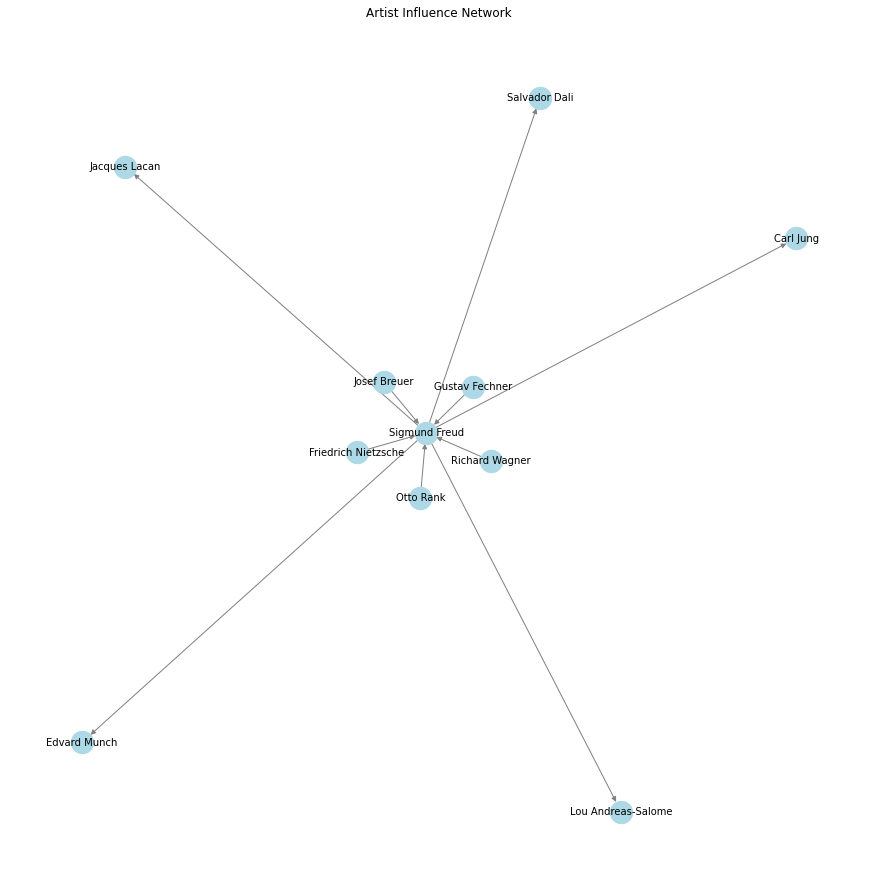

In [25]:
G = create_a_directed_graph(artist_influence_data)
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=500, font_size=10, node_color='lightblue', edge_color='gray')
plt.title("Artist Influence Network")
plt.show()

In [26]:
#Now: do 3 loops 

In [27]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}

for i in range(3):
    new_artists = set()
    for artist in artists_to_process:
        influencers, influencees = get_influencers_and_influencees(artist)
        for influencer in influencers.split(","):
            new_artists.add(influencer.strip()) 
        for influencee in influencees.split(","):
            new_artists.add(influencee.strip()) 
        artist_influence_data[artist] = {
            "influencers": influencers,
            "influencees": influencees
        }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

In [28]:
G = create_a_directed_graph(artist_influence_data)

# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True

# Convert the NetworkX graph to Pyvis
net.from_nx(G)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

directed_graph.html


In [29]:
def clean_response(response):
    cleaned_response = [re.sub(r'[^A-Za-z\s]', '', word).strip().lower() for word in response.split(",")]
    return cleaned_response

def get_influencers_and_influencees(artist_name):
    # influencers_query = f"Please provide a list of the full names without special characters of five artists and philosophers that influenced {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    #influencees_query = f"Please provide a list of the full names without special characters of five artists and philosophers that were influenced by {artist_name}, separated by commas, without any numbers, enumerations or additional text. The output format should not be a list, but a string."
    influencers_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who influenced {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """
    influencees_query = f"""Provide a string containing the full names (first and last names) of five artists and 
    philosophers who are influenced by {artist_name}. 
    The names should be free of special characters and separated by commas. 
    Please avoid any lists, numbers, or additional text in the response.
    Emphasize that each name must be a complete full name.
    Don't add any points at the end of the names. 
    """   
    events_query = f"""Provide the top three most important historical events (not philosophies) or environmental factors (described in one or two words) that influenced {artist_name}. 
    Some examples of such events are war, industrial revolution, french revolution ands artistic movement.
    Some wrong examples are Rousseau's philosophy and Mozart's music.
    People are not events, so don't return them. 
    Exlude events that are not that significant. 
    Try to make the examples as condense as possible. 
    Only return the examples that had a major influence. 
    Put the events in a list separated by a comma. Avoid numbers, dashes, enumerations and lists. 
    """  

    
    influencers = clean_response(get_chat_gpt(influencers_query))
    influencees = clean_response(get_chat_gpt(influencees_query))
    influencing_events = clean_response(get_chat_gpt(events_query))
    return influencers, influencees, influencing_events




In [ ]:
artists_processed = set()
artists_to_process = set(["Sigmund Freud"])
artist_influence_data = {}
node_types = dict()


for i in range(4):
    new_artists = set()
    for artist in artists_to_process:
        influencers, influencees, influencing_events = get_influencers_and_influencees(artist)
        for influencer in influencers:
            new_artists.add(influencer) 
        for influencee in influencees:
            new_artists.add(influencee) 
        for event in influencing_events:
            node_types[event] = "event"            
        artist_influence_data[artist] = {
            "influencers": influencers,
            "influencees": influencees, 
            "influencing_events": influencing_events
        }
    artists_processed.update(artists_to_process)
    artists_to_process = new_artists
    

In [ ]:
#artist_influence_data

In [ ]:
def create_a_directed_graph(artist_influence_data):
    # Create a directed graph
    G = nx.DiGraph()
    # Add nodes and edges based on the influence data
    for artist, influences in artist_influence_data.items():
        G.add_node(artist)
        # Add edges for influencers
        for influencer in influences["influencers"]:
            if influencer:
                G.add_edge(influencer, artist)
        # Add edges for influencees
        for influencee in influences["influencees"]:
            if influencee:
                G.add_edge(artist, influencee)
        # Add edges for influencing events
        for event in influences["influencing_events"]:
            if event:
                G.add_edge(event, artist)
    return G
G = create_a_directed_graph(artist_influence_data)

# Create a Pyvis network
net = Network(notebook=True, directed=True)  # Ensure directed=True


# Add nodes with different colors based on their type
for node in G.nodes():
    node_type = node_types.get(node, 'unknown')  # Default to 'unknown' if type is not provided
    if node_type == 'event':
        color = 'green'
    else:
        color = 'blue'  # For unknown types

    net.add_node(node, label=node, color=color)
    

# Add edges to the PyVis network
for source, target in G.edges():
    net.add_edge(source, target)

# Optionally apply layout for better visualization
net.force_atlas_2based()

# Show the interactive graph
net.show("directed_graph.html")

In [ ]:
# green: no people (beethoven)

In [ ]:
artist_influence_data["socrates"]